In this project, 
* I learned how to plot bar chart (one bar chart or multiple bar chart all at once), Stacked bar chart as well as side by side bar chart; 
* Time Series plot
* Also learned how to use group by & Aggregation
* How to use corr() in pandas, and what are the differences between different correlation method
* Learned how to do data type transformation including to_numeric, and to_datetime


In [6]:
import pandas as pd
data = pd.read_csv("data-export.csv")

In [2]:
data.head()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


The primary objective is to analyze and optimize web traffic and user engagement, focusing on:

* Session Analysis: Understanding the temporal distribution and trends in web sessions and user visits to identify peak times and low-traffic periods. Basically, that means what does the trends (time series) looks like in a given timeframe, for number of sessions and user visits?

* User Engagement Analysis: Evaluating how engaged users are during their sessions across different channels, aiming to enhance user interaction and satisfaction.

* Channel Performance: Assessing the effectiveness of various traffic channels in attracting and retaining users, to optimize marketing spend and strategy.

* Website Traffic Forecasting: Predicting future traffic trends to better allocate resources and tailor content delivery according to predicted user demand.

* Session primary channel group: The marketing channel (e.g., Direct, Organic Social)
* Date + hour (YYYYMMDDHH): The specific date and hour of the session
* Users: Number of users in a given time period
* Sessions: Number of sessions in that period
* Engaged sessions: Number of sessions with significant user engagement
* Average engagement time per session: The average time a user is engaged per session
* Engaged sessions per user: Ratio of engaged sessions to total sessions per user
* Events per session: Average number of events (actions taken) per session
* Engagement rate: The proportion of sessions that were engaged
* Event count: Total number of events during the period


In [10]:
new_header = data.iloc[0]
data = data[1:]
data.columns = new_header 

In [11]:
# The structure of the table: for each channel, each date + hour, 
# how many users are active, how many sessions in that period
# how many engaged sessions
data.head()

,Session primary channel group (Default channel group),Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
5,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 1 to 3182
Data columns (total 10 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Session primary channel group (Default channel group)  3182 non-null   object
 1   Date + hour (YYYYMMDDHH)                               3182 non-null   object
 2   Users                                                  3182 non-null   object
 3   Sessions                                               3182 non-null   object
 4   Engaged sessions                                       3182 non-null   object
 5   Average engagement time per session                    3182 non-null   object
 6   Engaged sessions per user                              3182 non-null   object
 7   Events per session                                     3182 non-null   object
 8   Engagement rate                                        318

In [14]:
data.describe()

,Session primary channel group (Default channel group),Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
count,3182,3182,3182,3182,3182,3182,3182,3182,3182,3182
unique,7,672,147,180,103,2823,808,2025,986,678
top,Direct,2024042417,1,1,0,0,0,1,0,1
freq,672,6,335,340,393,170,393,133,393,115


## Data type transformation

In [15]:
data['Date + hour (YYYYMMDDHH)'] = pd.to_datetime(data['Date + hour (YYYYMMDDHH)'],format='%Y%m%d%H')

In [16]:
data['Date + hour (YYYYMMDDHH)']

1      2024-04-16 23:00:00
2      2024-04-17 19:00:00
3      2024-04-17 23:00:00
4      2024-04-17 18:00:00
5      2024-04-17 20:00:00
               ...        
3178   2024-04-28 06:00:00
3179   2024-04-30 05:00:00
3180   2024-04-30 06:00:00
3181   2024-05-01 05:00:00
3182   2024-05-03 07:00:00
Name: Date + hour (YYYYMMDDHH), Length: 3182, dtype: datetime64[ns]

In [28]:
# Dealing with all the numeric SUM value
data['Users'] = pd.to_numeric(data['Users'])
data['Sessions'] = pd.to_numeric(data['Sessions'])
data['Event count'] = pd.to_numeric(data['Event count'])

In [29]:
# group data by date and sum up the users and sessions
grouped_data = data.groupby(data['Date + hour (YYYYMMDDHH)']).agg({'Users': 'sum', 'Sessions': 'sum','Event count':'sum'})

In [30]:
grouped_data

,Users,Sessions,Event count
Date + hour (YYYYMMDDHH),,,
2024-04-06 00:00:00,197,270,1078
2024-04-06 01:00:00,107,142,674
2024-04-06 02:00:00,115,142,725
2024-04-06 03:00:00,93,122,606
2024-04-06 04:00:00,79,102,486
...,...,...,...
2024-05-03 19:00:00,264,324,1572
2024-05-03 20:00:00,273,327,1749
2024-05-03 21:00:00,315,374,1855


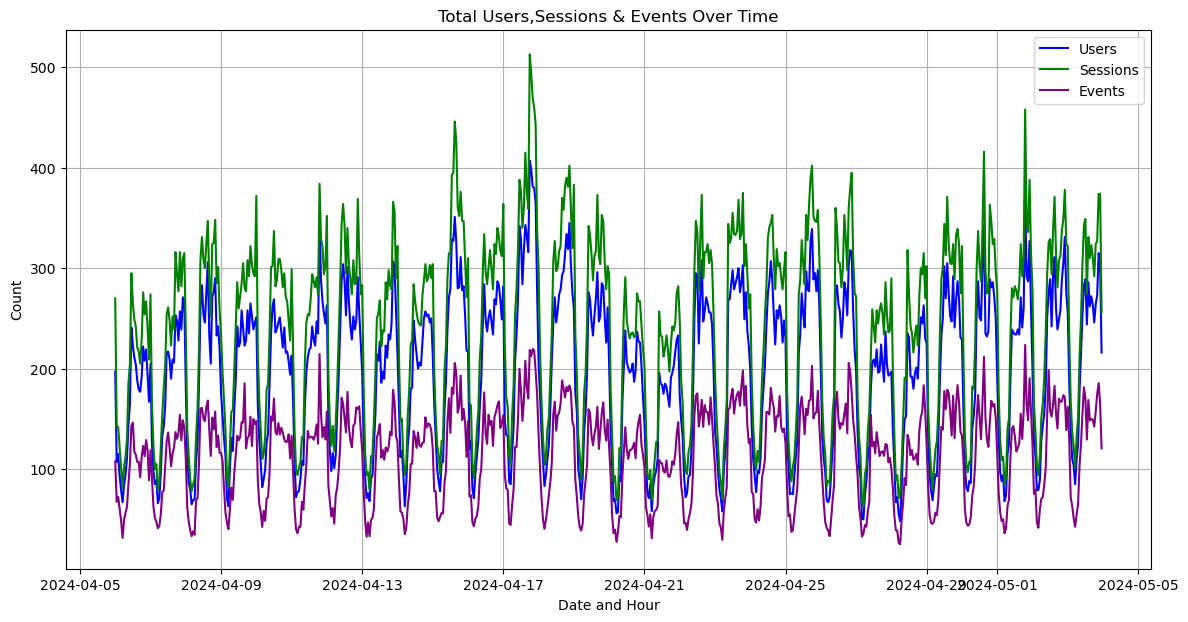

In [34]:
import matplotlib.pyplot as plt

# plotting the aggregated users and sessions over time
plt.figure(figsize=(14, 7))
plt.plot(grouped_data.index, grouped_data['Users'], label='Users', color='blue')
plt.plot(grouped_data.index, grouped_data['Sessions'], label='Sessions', color='green')

# The reason for dividing it ino 10 is just to scale the data so that it shows on the graph properly. (For better readability)
plt.plot(grouped_data.index, grouped_data['Event count']/10, label = 'Events', color = 'purple')
plt.title('Total Users,Sessions & Events Over Time')
plt.xlabel('Date and Hour')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

## User Engagement Analysis

In [21]:
# convert relevant columns to numeric for engagement analysis
data['Engaged sessions'] = pd.to_numeric(data['Engaged sessions'])
data['Average engagement time per session'] = pd.to_numeric(data['Average engagement time per session'])
data['Engaged sessions per user'] = pd.to_numeric(data['Engaged sessions per user'])
data['Events per session'] = pd.to_numeric(data['Events per session'])
data['Engagement rate'] = pd.to_numeric(data['Engagement rate'])

In [22]:
# group data by date and calculate mean for engagement metrics
engagement_metrics = data.groupby(data['Date + hour (YYYYMMDDHH)']).agg({
    'Average engagement time per session': 'mean',
    'Engaged sessions per user': 'mean',
    'Events per session': 'mean',
    'Engagement rate': 'mean'
})

In [23]:
engagement_metrics

,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate
Date + hour (YYYYMMDDHH),,,,
2024-04-06 00:00:00,55.070258,0.607673,3.610049,0.450262
2024-04-06 01:00:00,49.115957,0.644213,4.719012,0.489905
2024-04-06 02:00:00,66.270536,0.736716,5.372024,0.595759
2024-04-06 03:00:00,52.273710,0.568105,4.691984,0.446725
2024-04-06 04:00:00,67.222410,0.603943,4.686724,0.494964
...,...,...,...,...
2024-05-03 19:00:00,53.771757,0.568971,6.224420,0.498125
2024-05-03 20:00:00,87.194145,0.436159,6.370794,0.375790
2024-05-03 21:00:00,92.804300,0.546948,6.071114,0.471312


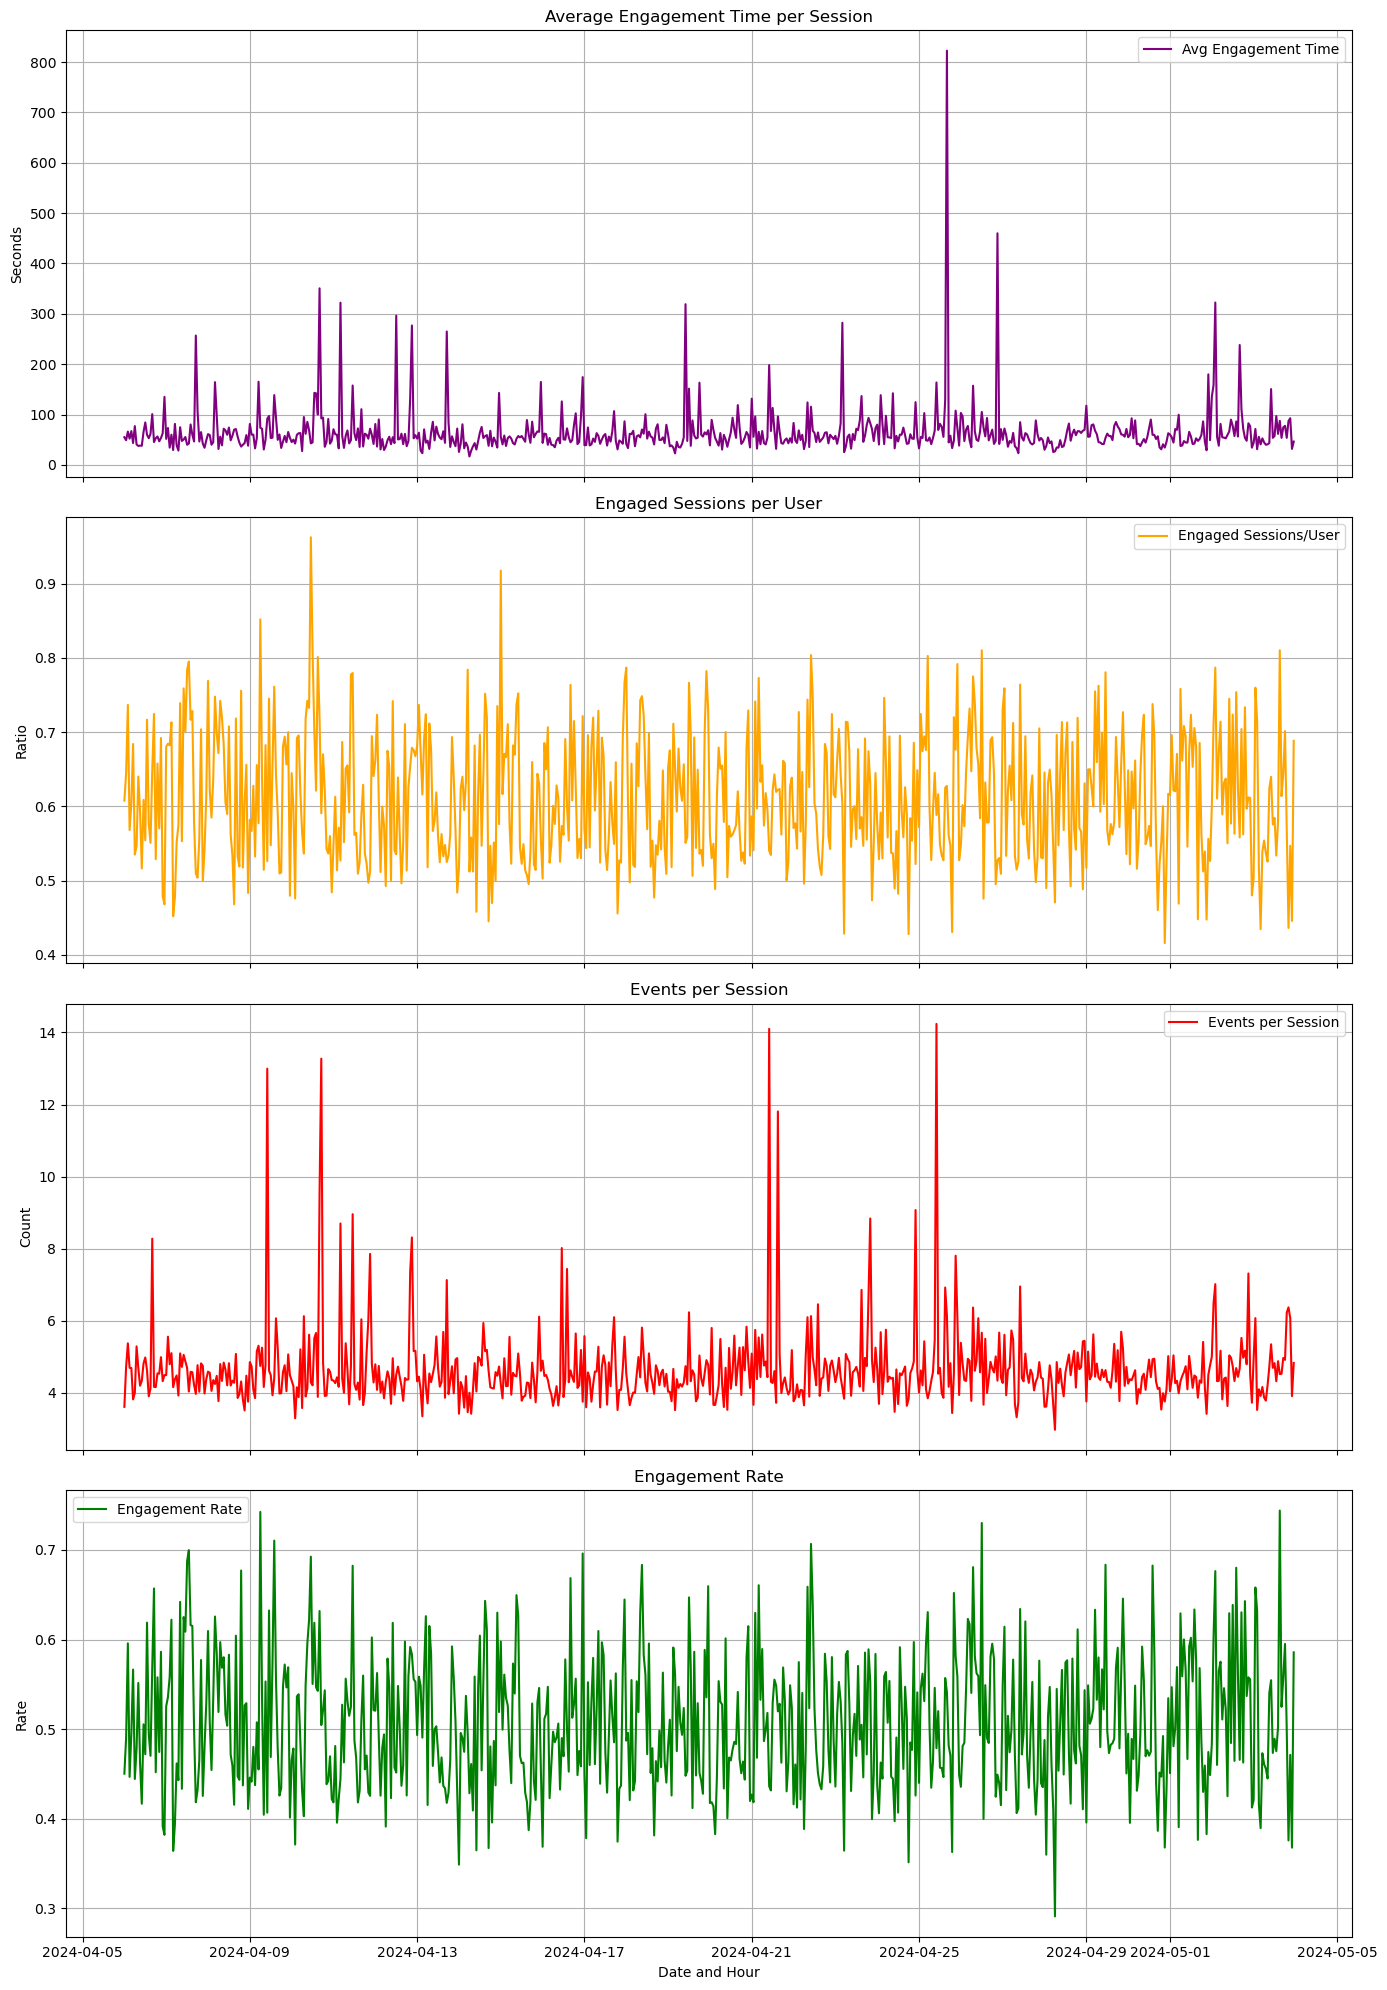

In [27]:
# plotting engagement metrics
fig, ax = plt.subplots(4, 1, figsize=(14, 20), sharex=True)


# The 1st plot: average engagement time per session across time
ax[0].plot(engagement_metrics.index, engagement_metrics['Average engagement time per session'], 
           label='Avg Engagement Time', 
           color='purple')
ax[0].set_title('Average Engagement Time per Session')
ax[0].set_ylabel('Seconds')

# The 2nd plot: engaged sessions per user across time
ax[1].plot(engagement_metrics.index, engagement_metrics['Engaged sessions per user'],
           label='Engaged Sessions/User', 
           color='orange')
ax[1].set_title('Engaged Sessions per User')
ax[1].set_ylabel('Ratio')

# The 3rd plot: events per session across time
ax[2].plot(engagement_metrics.index, engagement_metrics['Events per session'], 
           label='Events per Session', 
           color='red')
ax[2].set_title('Events per Session')
ax[2].set_ylabel('Count')

# The 4th plot: engagement rate across time
ax[3].plot(engagement_metrics.index, engagement_metrics['Engagement rate'], 
           label='Engagement Rate', 
           color='green')
ax[3].set_title('Engagement Rate')
ax[3].set_ylabel('Rate')
ax[3].set_xlabel('Date and Hour')

for a in ax:
    a.legend()
    a.grid(True)

plt.tight_layout()
plt.show()

## Seeing the correlation between each pair of metrics above

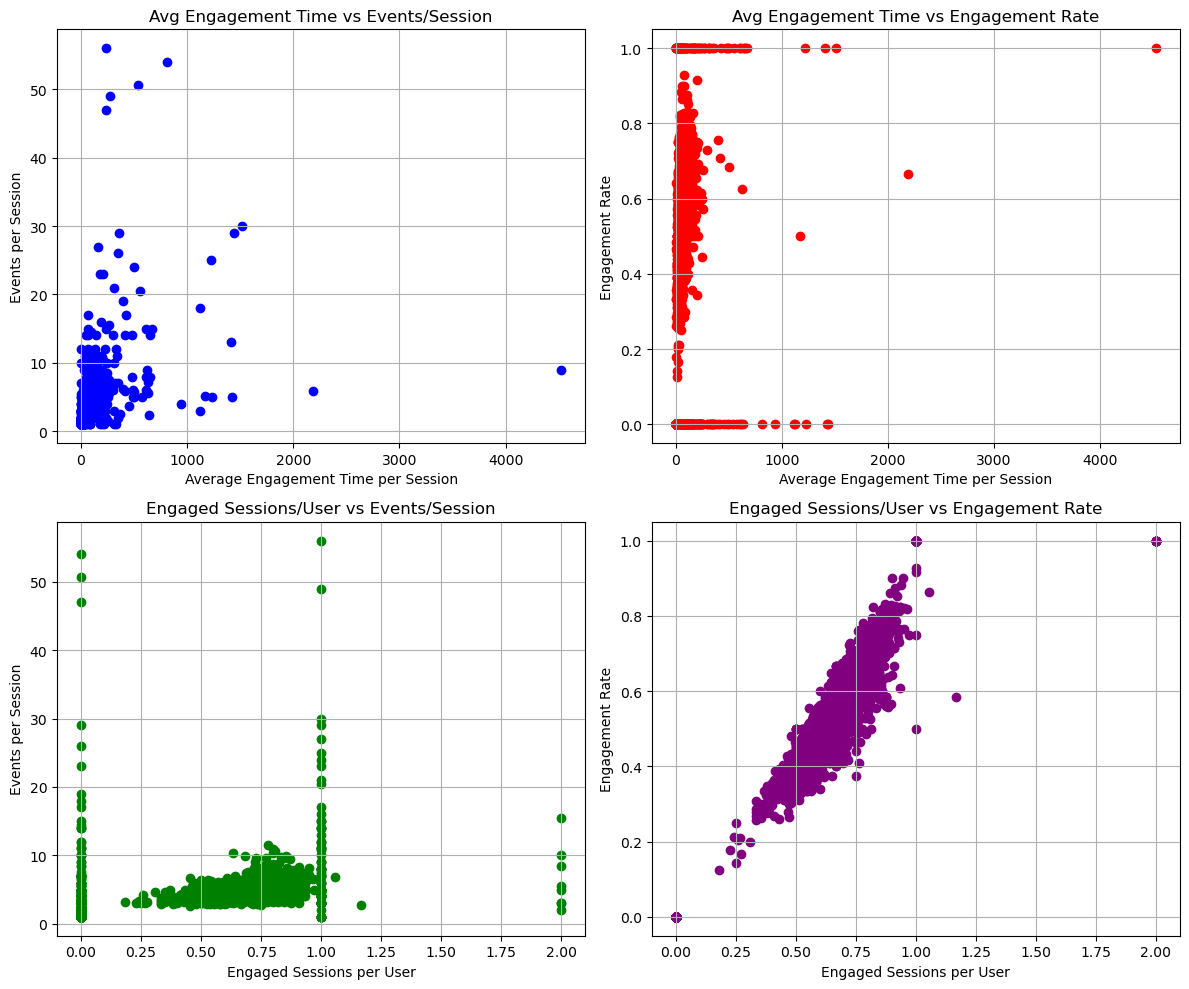

In [35]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))


# plot 1: average engagement time vs events per session
axes[0, 0].scatter(data['Average engagement time per session'], data['Events per session'], color='blue')
axes[0, 0].set_title('Avg Engagement Time vs Events/Session')
axes[0, 0].set_xlabel('Average Engagement Time per Session')
axes[0, 0].set_ylabel('Events per Session')
axes[0, 0].grid(True)  # enable grid

# plot 2: average engagement time vs engagement rate
axes[0, 1].scatter(data['Average engagement time per session'], data['Engagement rate'], color='red')
axes[0, 1].set_title('Avg Engagement Time vs Engagement Rate')
axes[0, 1].set_xlabel('Average Engagement Time per Session')
axes[0, 1].set_ylabel('Engagement Rate')
axes[0, 1].grid(True)

# plot 3: engaged sessions per user vs events per session
axes[1, 0].scatter(data['Engaged sessions per user'], data['Events per session'], color='green')
axes[1, 0].set_title('Engaged Sessions/User vs Events/Session')
axes[1, 0].set_xlabel('Engaged Sessions per User')
axes[1, 0].set_ylabel('Events per Session')
axes[1, 0].grid(True)

# plot 4: engaged sessions per user vs engagement rate
axes[1, 1].scatter(data['Engaged sessions per user'], data['Engagement rate'], color='purple')
axes[1, 1].set_title('Engaged Sessions/User vs Engagement Rate')
axes[1, 1].set_xlabel('Engaged Sessions per User')
axes[1, 1].set_ylabel('Engagement Rate')
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()




There are 2 ways for doing correlations:
1. One by one, using pearsonr
2. Directly using the corr() function in panda dataframe: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html


Method of correlation:
* pearson : standard correlation coefficient
* kendall : Kendall Tau correlation coefficient
* spearman : Spearman rank correlation

When to use what:
* Assumptions: Pearson correlation assumes linearity and normality, while Kendall and Spearman correlations make fewer assumptions about data distribution. Data Type: Pearson is best suited for continuous data, while Kendall and Spearman can handle ordinal (ranked) data.

From the definitions of the metrics, we should be able to notice that:
1. Engaged sessions per user = Engaged sessions / users
2. Events per session = Event count / sessions 
3. Engagement rate = engaged sessions / sessions

In [41]:
from scipy.stats import pearsonr
print(pearsonr(data['Engaged sessions per user'], data['Events per session']))
# print(pearsonr(data['Average engagement time per session'], data['Events per session']))
# print(pearsonr(data['Events per session'], data['']))
# print(pearsonr(data['Engaged sessions per user'], data['Events per session']))
metrics = data[['Average engagement time per session','Events per session','Engagement rate','Engaged sessions per user']]
# 'Average engagement time per session'
# 'Events per session'
# 'Engagement rate'
# 'Engaged sessions per user'

In [42]:
metrics.corr(method='pearson')

,Average engagement time per session,Events per session,Engagement rate,Engaged sessions per user
0,,,,
Average engagement time per session,1.000000,0.375762,0.111666,0.074939
Events per session,0.375762,1.000000,0.309156,0.270258
Engagement rate,0.111666,0.309156,1.000000,0.960417
Engaged sessions per user,0.074939,0.270258,0.960417,1.000000


We can see from the above graph, that there are high correlation between Engaged sessions per user, and Engagement rate (engaged session/total sessions)

## Channel Performance Analysis

How different marketing channesl contribute to traffic and engagement

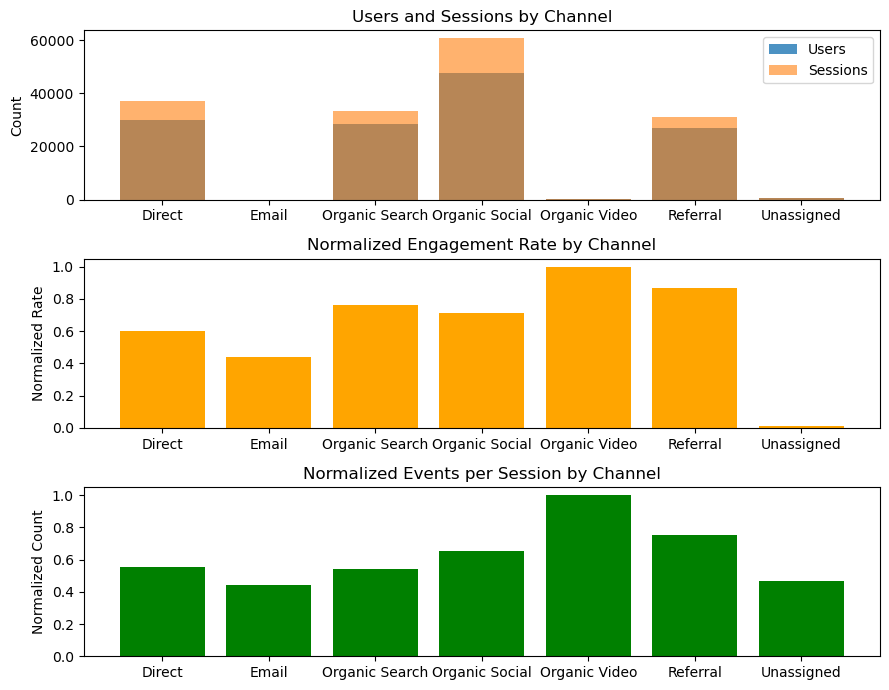

In [64]:
# group data by channel and aggregate necessary metrics
channel_performance = data.groupby('Session primary channel group (Default channel group)').agg({
    'Users': 'sum',
    'Sessions': 'sum',
    'Engaged sessions': 'sum',
    'Engagement rate': 'mean',
    'Events per session': 'mean'
})

# normalize engagement rate and events per session for comparison
channel_performance['Normalized Engagement Rate'] = channel_performance['Engagement rate'] / channel_performance['Engagement rate'].max()
channel_performance['Normalized Events per Session'] = channel_performance['Events per session'] / channel_performance['Events per session'].max()

# plotting channel performance metrics
fig, ax = plt.subplots(3, 1, figsize=(9, 7))

# users and sessions by channel
# Here I don't actually think plotting a stacked bar chart is a good idea, 
# but since the relative length is pretty obvious so it's not that bad
ax[0].bar(channel_performance.index, channel_performance['Users'], label='Users', alpha=0.8)
ax[0].bar(channel_performance.index, channel_performance['Sessions'], label='Sessions', alpha=0.6)
ax[0].set_title('Users and Sessions by Channel')
ax[0].set_ylabel('Count')
ax[0].legend()


# normalized engagement rate by channel
ax[1].bar(channel_performance.index, channel_performance['Normalized Engagement Rate'], color='orange')
ax[1].set_title('Normalized Engagement Rate by Channel')
ax[1].set_ylabel('Normalized Rate')

# normalized events per session by channel
ax[2].bar(channel_performance.index, channel_performance['Normalized Events per Session'], color='green')
ax[2].set_title('Normalized Events per Session by Channel')
ax[2].set_ylabel('Normalized Count')

plt.tight_layout()
plt.show()

In [49]:
channel_performance

,Users,Sessions,Engaged sessions,Engagement rate,Events per session,Normalized Engagement Rate,Normalized Events per Session
Session primary channel group (Default channel group),,,,,,,
Direct,30042,37203,17243,0.455723,4.152344,0.599636,0.551880
Email,2,3,1,0.333333,3.333333,0.438596,0.443027
Organic Search,28387,33372,19425,0.578906,4.070839,0.761719,0.541047
Organic Social,47572,60627,32697,0.541180,4.905193,0.712079,0.651939
Organic Video,123,141,109,0.760000,7.524000,1.000000,1.000000
Referral,26774,30990,20653,0.660882,5.673981,0.869582,0.754118
Unassigned,540,559,4,0.007514,3.533470,0.009886,0.469627


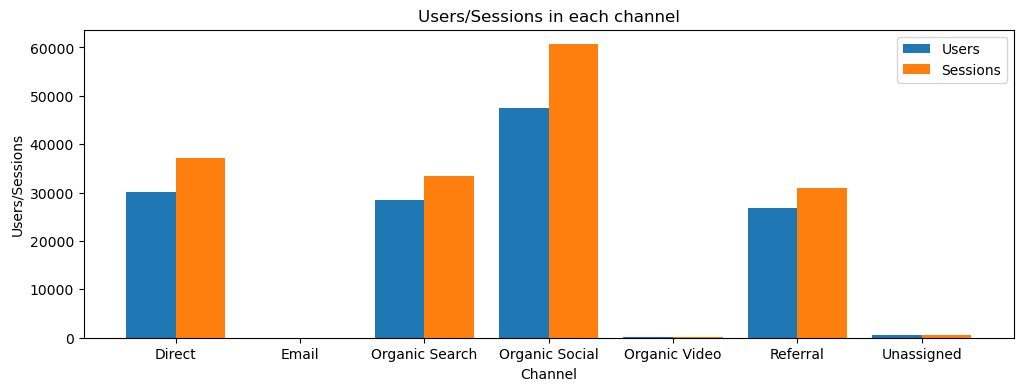

In [71]:
# A better approach to the first plot would be this:
# You should play around with each parameters, especially the width (which is the width of each bar)

import numpy as np
X_axis = np.arange(channel_performance.shape[0])

# Using this to define the size of the plot
fig = plt.figure(figsize=(12, 4))  
X = channel_performance.index
plt.bar(X_axis - 0.2, channel_performance['Users'], width = 0.4, label = 'Users') 
plt.bar(X_axis + 0.2, channel_performance['Sessions'], width = 0.4, label = 'Sessions') 
  
plt.xticks(X_axis, X) 
plt.xlabel("Channel") 
plt.ylabel("Users/Sessions") 
plt.title("Users/Sessions in each channel") 
plt.legend() 
plt.show()

## Forecasting website traffic

Now, let’s see how we can forecast the website traffic for the next 24 hours. It will involve creating a time series model to forecast future values based on the observed session data. Let’s start this by plotting the autocorrelation and partial autocorrelation plots of our time series data, which is typically done to help identify the order of an autoregressive integrated moving average for time series models for forecasting:

Here’s how to interpret the above graph:

* PACF (Partial Autocorrelation Function): This plot helps determine the p parameter for the AR part of the model. You look for the lag after which most partial autocorrelations are not significantly different from zero. In our plot, the PACF shows a significant spike at lag 1 and then cuts off, suggesting an AR part of order 1. Therefore, p=1.

* ACF (Autocorrelation Function): This plot helps identify the q parameter for the MA part of the model. You look for the lag after which most autocorrelations are not significantly different from zero. The ACF plot in our case tails off gradually, but considering the first significant spike is essential. Since the spike at lag 1 is significant and there’s a gradual tailing off rather than a sharp cut-off, it suggests a potential MA component. However, the tailing-off nature complicates the exact determination of q, but a starting point of q=1 could be considered.

The other parameter is d, representing seasonality. In our case, as seasonality exists, we can choose the value of d as 1. Now, here’s how we can forecast the website’s traffic for the next 24 hours using the SARIMA model:

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


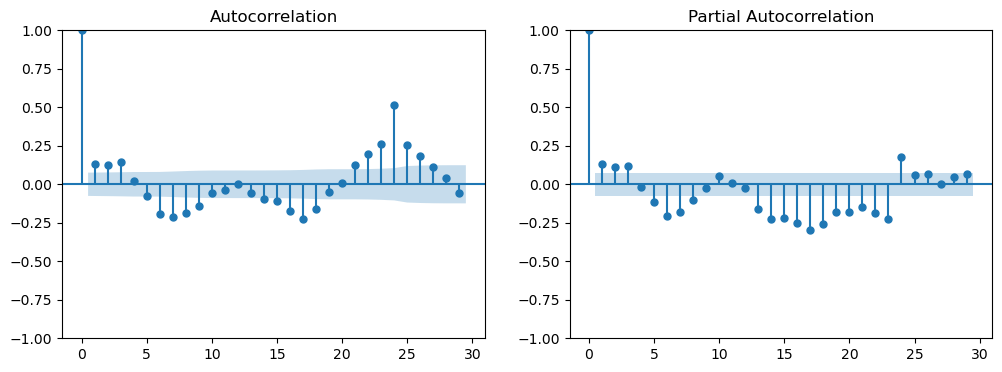

In [77]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

time_series_data = grouped_data['Sessions'].asfreq('H').fillna(method='ffill')
# seasonal_period = 24

# Using the diff() method, we can created a series with the difference between the previous records
# When the parameters is default, it calculates the difference with previous row
differenced_series = time_series_data.diff().dropna()

# plot ACF and PACF of time series
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(differenced_series, ax=axes[0])
plot_pacf(differenced_series, ax=axes[1])
plt.show()



What asfreq does:
* Convert time series to specified frequency.
* Returns the original data conformed to a new index with the specified frequency.

In [73]:
differenced_series

Date + hour (YYYYMMDDHH)
2024-04-06 01:00:00   -128.0
2024-04-06 02:00:00      0.0
2024-04-06 03:00:00    -20.0
2024-04-06 04:00:00    -20.0
2024-04-06 05:00:00    -21.0
                       ...  
2024-05-03 19:00:00     32.0
2024-05-03 20:00:00      3.0
2024-05-03 21:00:00     47.0
2024-05-03 22:00:00      0.0
2024-05-03 23:00:00   -118.0
Freq: H, Name: Sessions, Length: 671, dtype: float64

In [74]:
time_series_data

Date + hour (YYYYMMDDHH)
2024-04-06 00:00:00    270
2024-04-06 01:00:00    142
2024-04-06 02:00:00    142
2024-04-06 03:00:00    122
2024-04-06 04:00:00    102
                      ... 
2024-05-03 19:00:00    324
2024-05-03 20:00:00    327
2024-05-03 21:00:00    374
2024-05-03 22:00:00    374
2024-05-03 23:00:00    256
Freq: H, Name: Sessions, Length: 672, dtype: int64

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.74212D+00    |proj g|=  6.85385D-02

At iterate    5    f=  4.70443D+00    |proj g|=  1.38562D-02

At iterate   10    f=  4.62848D+00    |proj g|=  4.98718D-03

At iterate   15    f=  4.62397D+00    |proj g|=  2.06891D-02

At iterate   20    f=  4.62304D+00    |proj g|=  4.70074D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     32      1     0     0   2.801D-06   4.623D+00
  F =   4.6230161093209254     

CONVERG

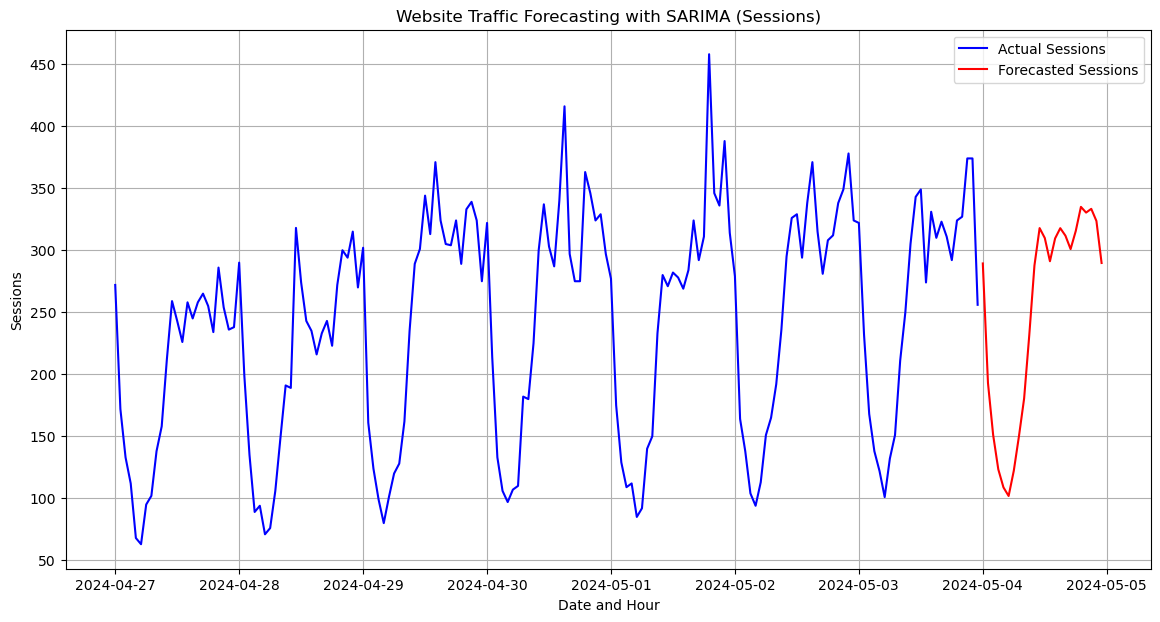

In [76]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

time_series_data = grouped_data['Sessions'].asfreq('H').fillna(method='ffill')
seasonal_period = 24


sarima_model = SARIMAX(time_series_data,
                      order=(1, 1, 1),
                      seasonal_order=(1, 1, 1, seasonal_period))
sarima_model_fit = sarima_model.fit()

# forecast the next 24 hours using the SARIMA model
sarima_forecast = sarima_model_fit.forecast(steps=24)

# plotting the actual data and the SARIMA forecast
plt.figure(figsize=(14, 7))
plt.plot(time_series_data.index[-168:], time_series_data[-168:], label='Actual Sessions', color='blue')  # last week data
plt.plot(pd.date_range(time_series_data.index[-1], periods=25, freq='H')[1:], sarima_forecast, label='Forecasted Sessions', color='red')
plt.title('Website Traffic Forecasting with SARIMA (Sessions)')
plt.xlabel('Date and Hour')
plt.ylabel('Sessions')
plt.legend()
plt.grid(True)
plt.show()